## 1. Loading Data:

In [96]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
#Loading data into dataframe
legitimate_df = pd.read_csv("legitimate_websites.csv")
phishing_df = pd.read_csv("phishing_websites.csv")
df = pd.concat([legitimate_df, phishing_df], axis=0)
df = df.sample(frac=1)
# Drop unnecessary columns
df = df.drop(['Hppts', 'URL'], axis=1)

desired_features = ['number_of_href', 'number_of_list', 'length_of_text', 'prefixSuffix', 'number_of_a', 'has_link', 'number_of_hidden_element', 'WebsiteForwarding', 'number_of_div', 'number_of_forms', 'SubDomains', 'number_of_images', 'number_of_script', 'longUrl', 'number_of_meta', 'shortUrl', 'length_of_title', 'number_of_paragraph', 'number_of_span', 'LinksPointingToPage']
desired_features.append('label')
# choose only Top 20 Important Features:
# df = df[desired_features]
df.head()

,has_title,has_submit,has_link,has_email_input,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_href,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,label
5537,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,1
3588,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
557,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4478,1,0,1,0,0,14,48,0,34,113,...,0,1,0,0,0,0,1,0,1,0
3711,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


## 2. Visualizing the Data:

(20226, 74)


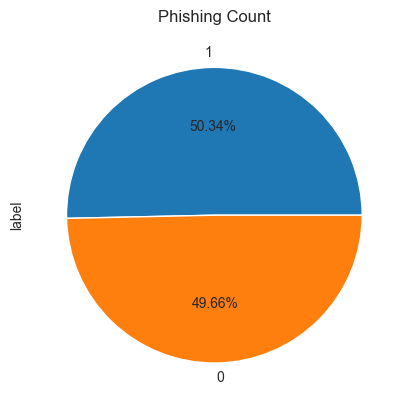

In [97]:
print(df.shape)
df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [73]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_href,20226.0,79.596015,209.023957,0.0,0.0,2.0,82.0,4560.0
number_of_list,20226.0,49.784337,403.993393,0.0,0.0,0.0,27.0,16645.0
length_of_text,20226.0,5514.115396,29432.439779,0.0,132.0,425.0,5848.0,1609391.0
prefixSuffix,20226.0,0.220755,0.414766,0.0,0.0,0.0,0.0,1.0
number_of_a,20226.0,81.739988,218.375583,0.0,1.0,5.0,83.0,7371.0
has_link,20226.0,0.701276,0.457710,0.0,0.0,1.0,1.0,1.0
number_of_hidden_element,20226.0,138.489617,349.150920,0.0,7.0,36.0,143.0,12296.0
WebsiteForwarding,20226.0,0.779541,0.414566,0.0,1.0,1.0,1.0,1.0
number_of_div,20226.0,177.810739,450.337629,0.0,4.0,27.0,162.0,10470.0
number_of_forms,20226.0,0.611589,2.540127,0.0,0.0,0.0,1.0,200.0


## 3. Split the Data:
The data is split into train & test sets, 80-20 split.

In [98]:
# Splitting the dataset into dependant and independant fetature
X = df.drop(["label"],axis =1)
y = df["label"]
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16180, 73), (16180,), (4046, 73), (4046,))

## 4. Model Building & Training:

1. k-Nearest Neighbors 
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Catboost
6. Xgboost         

In [99]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
prediction_time = []

#function to call for storing the results
def storeResults(model, a,b,c,d, pred_time):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
  prediction_time.append(round(pred_time, 3))

## 4.1. K-Nearest Neighbors:

### Cross Validation:

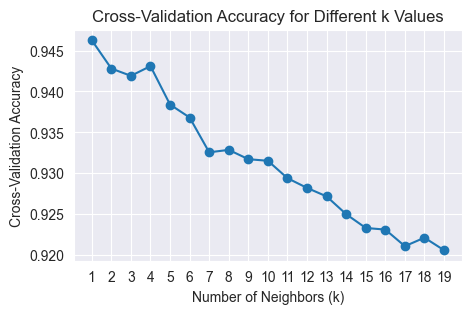

Best n_neighbors Value: 1
Average Accuracy: 0.9462573971637663


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define n_neighbors range
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation with scaled data
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plotting the cross-validation scores for each k
plt.figure(figsize=(5, 3))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find Best n_neighbors Value:
best_k = k_values[np.argmax(cv_scores)]
print(f"Best n_neighbors Value: {best_k}")
print(f"Average Accuracy: {max(cv_scores)}")


### Train the best Model:

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import time

# Assuming X_train and X_test are your feature matrices
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model using the scaled data
start_train = time.time()
knn.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Measure prediction time for training data
start_predict_train = time.time()
y_train_knn = knn.predict(X_train_scaled)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_knn = knn.predict(X_test_scaled)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output the times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")
#computing the accuracy,f1_score,Recall,precision of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_test_knn are your true and predicted labels
report = classification_report(y_test, y_test_knn, output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the modified report
print(report_df)


Training Time: 0.0020 seconds
Prediction Time on Training Data: 0.7770 seconds
Prediction Time on Test Data: 0.2770 seconds
K-Nearest Neighbors : Accuracy on training Data: 0.991
K-Nearest Neighbors : Accuracy on test Data: 0.949

K-Nearest Neighbors : f1_score on training Data: 0.991
K-Nearest Neighbors : f1_score on test Data: 0.949

K-Nearest Neighborsn : Recall on training Data: 0.990
Logistic Regression : Recall on test Data: 0.954

K-Nearest Neighbors : precision on training Data: 0.992
K-Nearest Neighbors : precision on test Data: 0.945
           precision    recall  f1-score
0           0.953823  0.944909  0.949345
1           0.944882  0.953800  0.949320
accuracy    0.949333  0.949333  0.949333
macro avg   0.949353  0.949355  0.949333


### Store Results:

In [89]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn, predict_test_time)

## 4.2. Decision Trees: 

### Cross Validation:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try max_depth from 1 to 30
depth = range(1, 30)

for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    
    # Perform 5-fold cross-validation and calculate mean accuracy on scaled data
    scores = cross_val_score(tree_test, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for max_depth from 1 to 30
plt.figure(figsize=(5, 3))
plt.plot(depth, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Accuracy vs Max Depth (Cross-Validation with Normalization)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best max_depth and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_max_depth = depth[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Calculate the average accuracy across all max_depth values
average_accuracy = np.mean(cv_mean_accuracy)

# Output the best max_depth, corresponding accuracy, and average accuracy
print(f"Best max_depth: {best_max_depth}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")
print(f"Average Cross-Validation Accuracy: {average_accuracy:.3f}")


### Train Best Model:

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import time
import matplotlib.pyplot as plt

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Decision Tree model
tree = DecisionTreeClassifier(max_depth=28)

# Train the model on the full scaled training set
start_train = time.time()
tree.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Measure prediction time for training data
start_predict_train = time.time()
y_train_tree = tree.predict(X_train_scaled)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_tree = tree.predict(X_test_scaled)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output training and prediction times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute accuracy, f1_score, Recall, precision of the model performance
from sklearn import metrics

acc_train_tree = metrics.accuracy_score(y_train, y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test, y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train, y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test, y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train, y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test, y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train, y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test, y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

# Evaluate the model's performance on the test set
report = classification_report(y_test, y_test_tree, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)



Training Time: 0.1040 seconds
Prediction Time on Training Data: 0.0030 seconds
Prediction Time on Test Data: 0.0010 seconds
Decision Tree : Accuracy on training Data: 0.993
Decision Tree : Accuracy on test Data: 0.950

Decision Tree : f1_score on training Data: 0.993
Decision Tree : f1_score on test Data: 0.950

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.954

Decision Tree : precision on training Data: 0.995
Decision Tree : precision on test Data: 0.946
Classification Report:
           precision    recall  f1-score
0           0.954183  0.945239  0.949690
1           0.945535  0.954433  0.949963
accuracy    0.949827  0.949827  0.949827
macro avg   0.949859  0.949836  0.949827


Top 20 Features:
['number_of_href', 'length_of_text', 'prefixSuffix', 'number_of_a', 'has_link', 'number_of_div', 'number_of_hidden_element', 'WebsiteForwarding', 'SubDomains', 'length_of_title', 'number_of_images', 'number_of_meta', 'number_of_span', 'shortUrl', 'longUrl', 'number_of_script', 'number_of_paragraph', 'number_of_inputs', 'number_of_list', 'LinksPointingToPage']


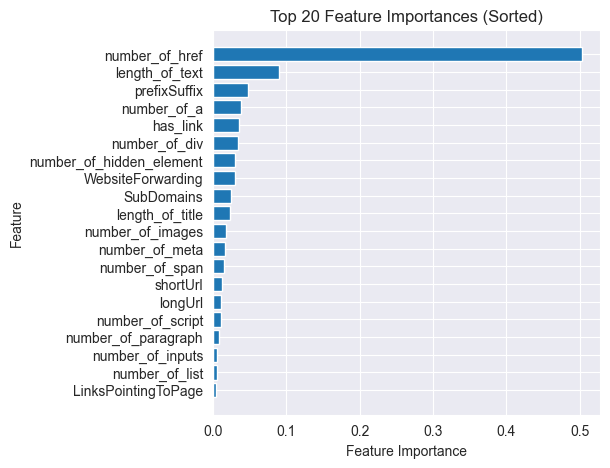

In [43]:
# Calculate feature importance and sort them
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree.feature_importances_
})
feature_importance_sorted = feature_importance.sort_values('importance', ascending=False)

# Select and print the top 20 most important features
top_20_features = feature_importance_sorted.head(20)
print("Top 20 Features:")
print(top_20_features['feature'].tolist())

# Plot the top 20 features
plt.figure(figsize=(5, 5))
plt.barh(range(len(top_20_features)), 
         top_20_features['importance'], 
         align='center')
plt.yticks(range(len(top_20_features)), 
           top_20_features['feature'])
plt.title("Top 20 Feature Importances (Sorted)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


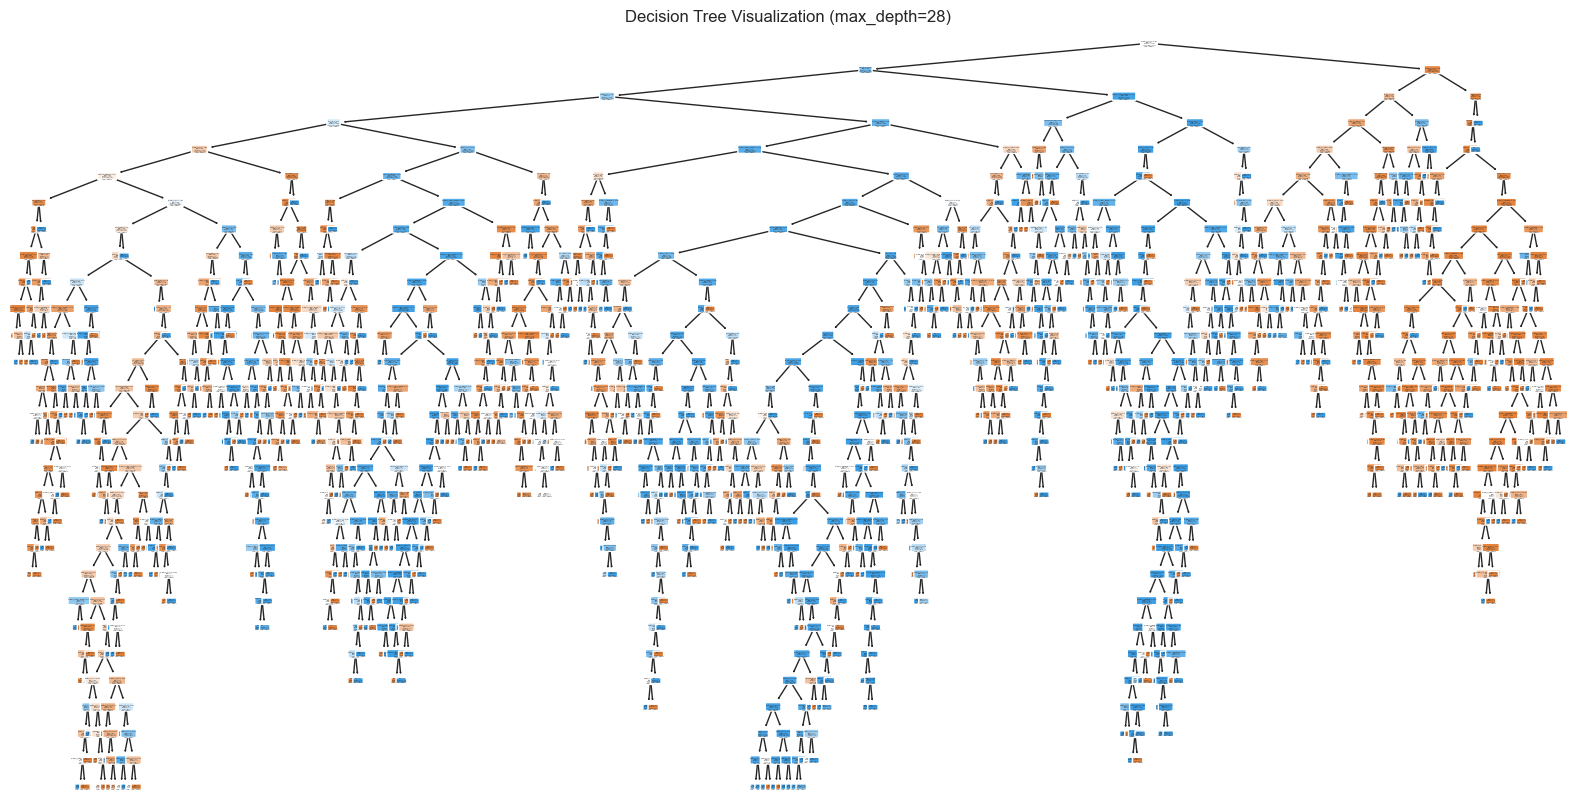

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier with a specific max_depth
tree = DecisionTreeClassifier(max_depth=28)  # Use the best max_depth found previously
tree.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title(f"Decision Tree Visualization (max_depth={28})")
plt.show()


### Store Results

In [88]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree, predict_test_time)

## 4.3. Random Forest: 

### Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try n_estimators from 1 to 20
n_estimators_range = range(1, 30)

for n in n_estimators_range:
    forest_test = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(forest_test, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for n_estimators from 1 to 20
plt.figure(figsize=(5, 3))
plt.plot(n_estimators_range, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators (n_estimators)")
plt.title("Random Forest Accuracy vs Number of Estimators (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best n_estimators and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_n_estimators = n_estimators_range[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")


### Train the best Model:

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)

# Fit the model
forest.fit(X_train, y_train)

# Measure prediction time for training data
start_predict_train = time.time()
y_train_forest = forest.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_forest = forest.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_forest, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Prediction Time on Training Data: 0.0280 seconds
Prediction Time on Test Data: 0.0090 seconds
Random Forest : Accuracy on training Data: 0.992
Random Forest : Accuracy on test Data: 0.970

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.970

Random Forest : Recall on training Data: 0.991
Random Forest : Recall on test Data: 0.964

Random Forest : precision on training Data: 0.993
Random Forest : precision on test Data: 0.951
Classification Report:
           precision    recall  f1-score
0           0.964981  0.975898  0.970408
1           0.975377  0.964232  0.969773
accuracy    0.970094  0.970094  0.970094
macro avg   0.970179  0.970065  0.970091


### Store Results:

In [87]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest, predict_test_time)

## 4.4.Gradient Boosting Classifier：

### Cross Validation:

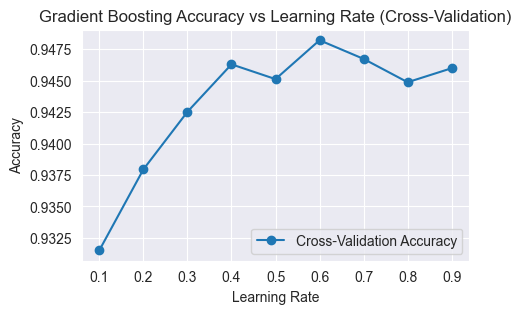

Best Learning Rate: 0.6000000000000001
Best Cross-Validation Accuracy: 0.948


In [172]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try learning_rate from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]

for lr in learning_rates:
    forest_test = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(forest_test, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for learning_rate from 0.1 to 0.9
plt.figure(figsize=(5, 3))
plt.plot(learning_rates, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("Gradient Boosting Accuracy vs Learning Rate (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning_rate and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_learning_rate = learning_rates[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best learning_rate and corresponding accuracy
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")


### Train the best Model:

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import pandas as pd
import time

# Use the best learning rate found from cross-validation
best_learning_rate = 0.9

# Instantiate the model with the best learning rate
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=best_learning_rate)

# Fit the model
gbc.fit(X_train, y_train)

# Measure prediction time for training data
start_predict_train = time.time()
y_train_gbc = gbc.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_gbc = gbc.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute and print accuracy, f1_score, recall, precision of the model performance
acc_train_gbc = metrics.accuracy_score(y_train, y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test, y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train, y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test, y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train, y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test, y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train, y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test, y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_gbc, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Prediction Time on Training Data: 0.0190 seconds
Prediction Time on Test Data: 0.0050 seconds
Gradient Boosting Classifier : Accuracy on training Data: 0.973
Gradient Boosting Classifier : Accuracy on test Data: 0.953

Gradient Boosting Classifier : f1_score on training Data: 0.974
Gradient Boosting Classifier : f1_score on test Data: 0.953

Gradient Boosting Classifier : Recall on training Data: 0.974
Gradient Boosting Classifier : Recall on test Data: 0.957

Gradient Boosting Classifier : precision on training Data: 0.974
Gradient Boosting Classifier : precision on test Data: 0.948
Classification Report:
           precision    recall  f1-score
0           0.957278  0.947860  0.952546
1           0.947860  0.957278  0.952546
accuracy    0.952546  0.952546  0.952546
macro avg   0.952569  0.952569  0.952546


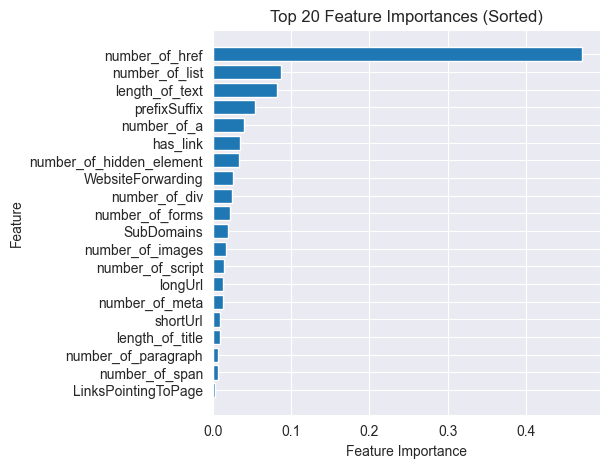

Top 20 Features:
['number_of_href', 'number_of_list', 'length_of_text', 'prefixSuffix', 'number_of_a', 'has_link', 'number_of_hidden_element', 'WebsiteForwarding', 'number_of_div', 'number_of_forms', 'SubDomains', 'number_of_images', 'number_of_script', 'longUrl', 'number_of_meta', 'shortUrl', 'length_of_title', 'number_of_paragraph', 'number_of_span', 'LinksPointingToPage']


In [32]:
# Get feature importance and sort
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gbc.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Select the top 20 most important features
top_20_features = feature_importance.head(20)

# Plot the top 20 features
plt.figure(figsize=(5, 5))
plt.barh(range(len(top_20_features)), 
         top_20_features['importance'], 
         align='center')
plt.yticks(range(len(top_20_features)), 
           top_20_features['feature'])
plt.title("Top 20 Feature Importances (Sorted)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Print the names of the top 30 features
print("Top 20 Features:")
print(top_20_features['feature'].tolist())


### Store the results

In [84]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc, predict_test_time)

## 4.5. CatBoost：

### Cross Validation

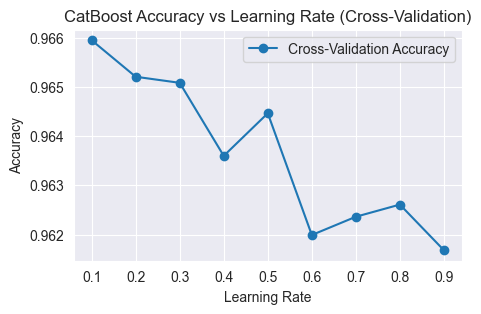

Best Learning Rate: 0.1
Best Cross-Validation Accuracy: 0.966


In [9]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try learning_rate from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]

for lr in learning_rates:
    forest_test = CatBoostClassifier(learning_rate=lr, silent=True)
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(forest_test, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for learning_rate from 0.1 to 0.9
plt.figure(figsize=(5, 3))
plt.plot(learning_rates, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("CatBoost Accuracy vs Learning Rate (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning_rate and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_learning_rate = learning_rates[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best learning_rate and corresponding accuracy
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")




### Train the best Model:

In [80]:
from catboost import CatBoostClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model
cat = CatBoostClassifier(learning_rate=0.1, verbose=0)  # Set verbose=0 to suppress output during training

# Measure training time
start_train_time = time.time()
cat.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Output training time
print(f"Training Time: {train_time:.4f} seconds")

# Measure prediction time for training data
start_predict_train = time.time()
y_train_cat = cat.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_cat = cat.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute and print accuracy, f1_score, recall, precision of the model performance
acc_train_cat = metrics.accuracy_score(y_train, y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test, y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train, y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test, y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train, y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test, y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train, y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test, y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_cat, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Training Time: 5.8390 seconds
Prediction Time on Training Data: 0.0040 seconds
Prediction Time on Test Data: 0.0030 seconds
CatBoost Classifier : Accuracy on training Data: 0.988
CatBoost Classifier : Accuracy on test Data: 0.970

CatBoost Classifier : f1_score on training Data: 0.988
CatBoost Classifier : f1_score on test Data: 0.969

CatBoost Classifier : Recall on training Data: 0.988
CatBoost Classifier : Recall on test Data: 0.968

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.971
Classification Report:
           precision    recall  f1-score
0           0.968137  0.971471  0.969801
1           0.971087  0.967710  0.969395
accuracy    0.969600  0.969600  0.969600
macro avg   0.969612  0.969590  0.969598


### Store the Results:

In [85]:
storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat, predict_test_time)

## 4.6. XGBoost：
### Cross Validation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try learning_rate from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]

for lr in learning_rates:
    xgb_model = XGBClassifier(learning_rate=lr, use_label_encoder=False, eval_metric='mlogloss')
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for learning_rate from 0.1 to 0.9
plt.figure(figsize=(5, 3))
plt.plot(learning_rates, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("XGBoost Accuracy vs Learning Rate (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning_rate and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_learning_rate = learning_rates[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best learning_rate and corresponding accuracy
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")


### Train the best Model:

In [81]:
from xgboost import XGBClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model with a learning rate of 0.8
xgb = XGBClassifier(learning_rate=0.8, use_label_encoder=False, eval_metric='logloss')

# Measure training time
start_train_time = time.time()
xgb.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Output training time
print(f"Training Time: {train_time:.4f} seconds")

# Measure prediction time for training data
start_predict_train = time.time()
y_train_xgb = xgb.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_xgb = xgb.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute and print accuracy, f1_score, recall, precision of the model performance
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_xgb))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Training Time: 0.0890 seconds
Prediction Time on Training Data: 0.0120 seconds
Prediction Time on Test Data: 0.0060 seconds
XGBoost Classifier : Accuracy on training Data: 0.989
XGBoost Classifier : Accuracy on test Data: 0.966

XGBoost Classifier : f1_score on training Data: 0.989
XGBoost Classifier : f1_score on test Data: 0.966

XGBoost Classifier : Recall on training Data: 0.988
XGBoost Classifier : Recall on test Data: 0.964

XGBoost Classifier : precision on training Data: 0.990
XGBoost Classifier : precision on test Data: 0.967
Classification Report:
           precision    recall  f1-score
0           0.964689  0.967536  0.966110
1           0.967115  0.964232  0.965672
accuracy    0.965892  0.965892  0.965892
macro avg   0.965902  0.965884  0.965891


### Store the Results:

In [86]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb, predict_test_time)

## 5. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [90]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'prediction_time' : prediction_time
                      })

In [91]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision,prediction_time
0,Gradient Boosting Classifier,0.953,0.953,0.974,0.974,0.006
1,CatBoost Classifier,0.970,0.969,0.988,0.989,0.006
2,XGBoost Classifier,0.966,0.966,0.988,0.990,0.006
3,Random Forest,0.970,0.970,0.991,0.993,0.006
4,Decision Tree,0.953,0.953,0.990,0.994,0.006
5,K-Nearest Neighbors,0.949,0.949,0.990,0.992,0.006


In [92]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision,prediction_time
0,Random Forest,0.970,0.970,0.991,0.993,0.006
1,CatBoost Classifier,0.970,0.969,0.988,0.989,0.006
2,XGBoost Classifier,0.966,0.966,0.988,0.990,0.006
3,Gradient Boosting Classifier,0.953,0.953,0.974,0.974,0.006
4,Decision Tree,0.953,0.953,0.990,0.994,0.006
5,K-Nearest Neighbors,0.949,0.949,0.990,0.992,0.006


## 6. Storing Best Model

In [101]:
# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)
# Fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=22)

In [102]:

import pickle
# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)
# Fit the model
forest.fit(X_train, y_train)
# dump information to that file
res = pickle.dump(forest, open('model.pkl', 'wb'))
print(res)

None
